/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of entries: 18132
Number of features: 6
   turns  white_rating  black_rating  rated winner  first_move_Nc3  \
1     16          1322          1261   True  black           False   
2     61          1496          1500   True  white           False   
3     61          1439          1454   True  white           False   
4     95          1523          1469   True  white           False   
6     33          1520          1423   True  white           False   
8     66          1439          1392   True  black           False   
9    119          1381          1209   True  white           False   

   first_move_Nf3  first_move_Nh3  first_move_a3  first_move_a4  ...  \
1           False           False          False          False  ...   
2           False           False          False          False  ...   
3           False           False          False          False  ...   
4           False           False          False          False  ...   
6           False           Fals

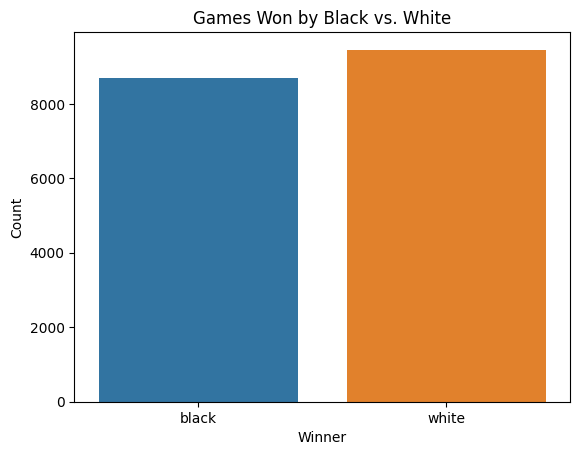

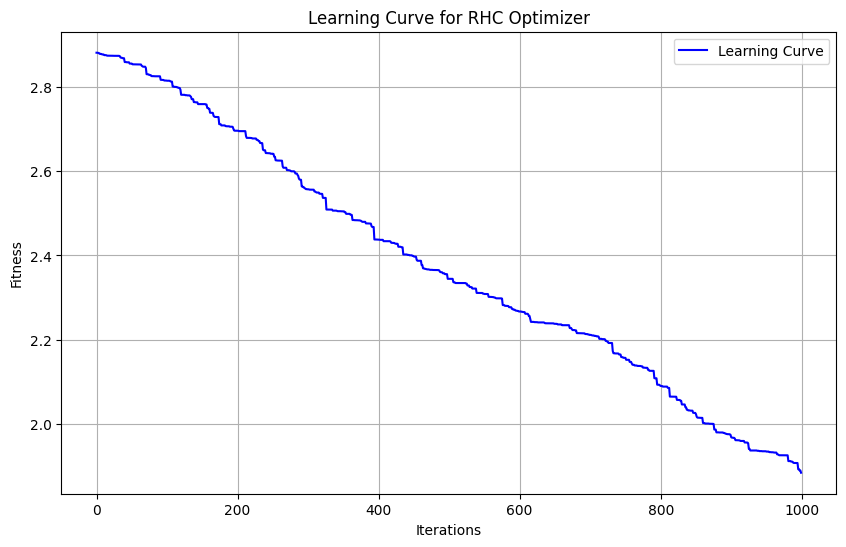

max iterations 1000
SA Training Accuracy: 0.4429
SA Testing Accuracy: 0.4513
SA took 27.582149744033813 seconds to execute.


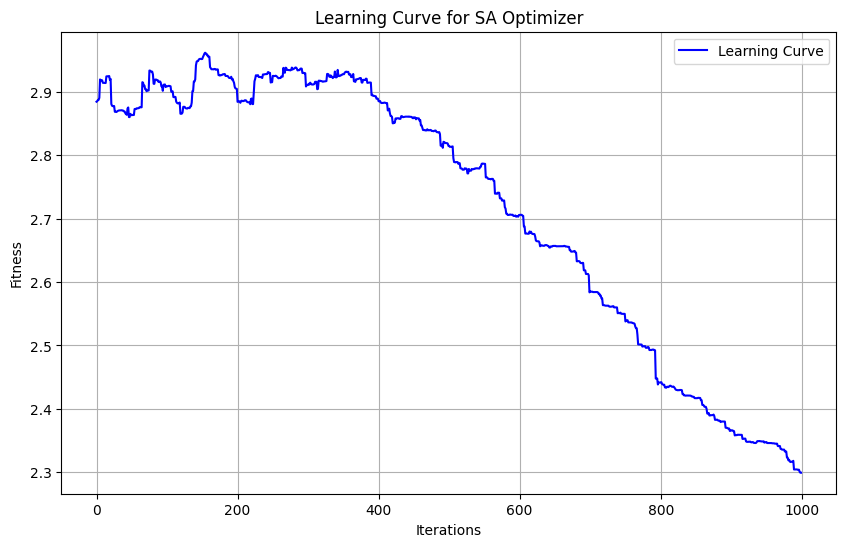

max iterations 1000
GA Training Accuracy: 0.6403
GA Testing Accuracy: 0.6490
GA took 3165.764562368393 seconds to execute.


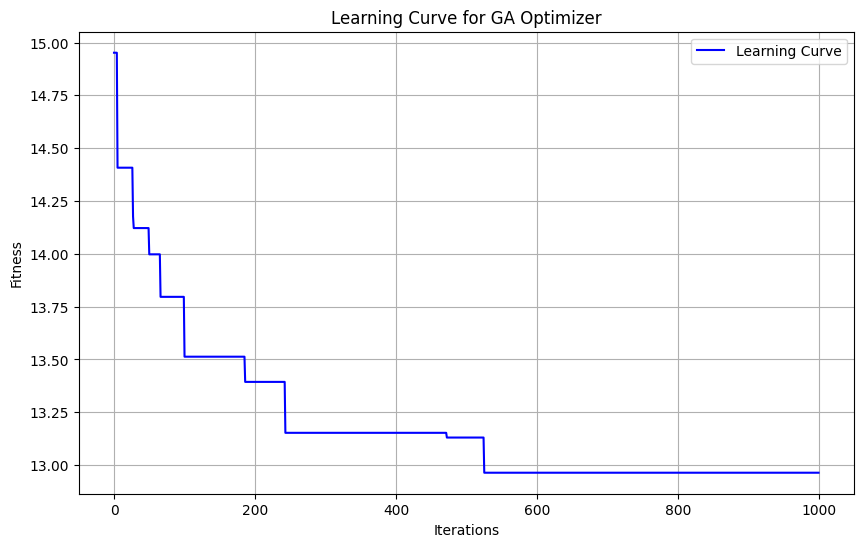

In [1]:
from sklearn.model_selection import train_test_split
from constants import TEST_SIZE, RANDOM_STATE 
import warnings
from sklearn.preprocessing import StandardScaler
from NNOptimizerOptuna import nn
from NNOptimizationHelpers import plot_curve, get_data, train_nn_with_optimizer
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)

np.random.seed(RANDOM_STATE)
# Split data into training and testing sets
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)


#run scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This calls to get the best NN params
# run_optuna(X_train_scaled, X_test_scaled, y_train, y_test)

rhc_nn = train_nn_with_optimizer(X_train_scaled, X_test_scaled, y_train, y_test, 'random_hill_climb', 'RHC')
plot_curve(rhc_nn.fitness_curve, 'RHC Optimizer')
sa_nn = train_nn_with_optimizer(X_train_scaled, X_test_scaled, y_train, y_test, 'simulated_annealing', 'SA')
plot_curve(sa_nn.fitness_curve, 'SA Optimizer')

ga_nn = train_nn_with_optimizer(X_train_scaled, X_test_scaled, y_train, y_test, 'genetic_alg', 'GA')
plot_curve(ga_nn.fitness_curve, 'GA Optimizer')


Run the training and plotting of the curves through a pool to be faster.

In [ ]:
import multiprocessing

def train_and_plot(args):
    X_train_scaled, X_test_scaled, y_train, y_test, algorithm, name = args
    nn_model = train_nn_with_optimizer(X_train_scaled, X_test_scaled, y_train, y_test, algorithm, name)
    plot_curve(nn_model.fitness_curve, f'{name} Optimizer')
    return nn_model

if __name__ == '__main__':  # Required for Windows
    # Prepare the arguments for each training task
    args_list = [
        (X_train_scaled, X_test_scaled, y_train, y_test, 'random_hill_climb', 'RHC'),
        (X_train_scaled, X_test_scaled, y_train, y_test, 'simulated_annealing', 'SA'),
        (X_train_scaled, X_test_scaled, y_train, y_test, 'genetic_alg', 'GA')
    ]
    
    # Create a process pool and start training
    with multiprocessing.Pool() as pool:
        trained_models = pool.map(train_and_plot, args_list)


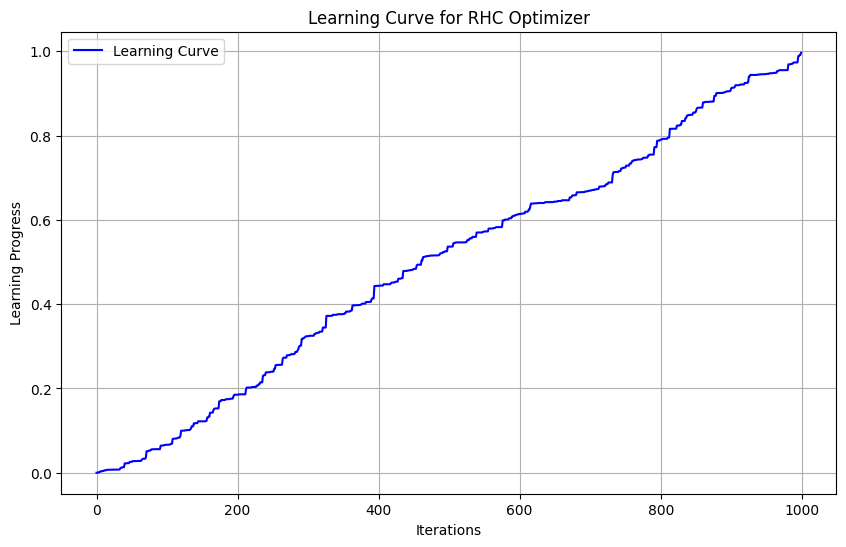

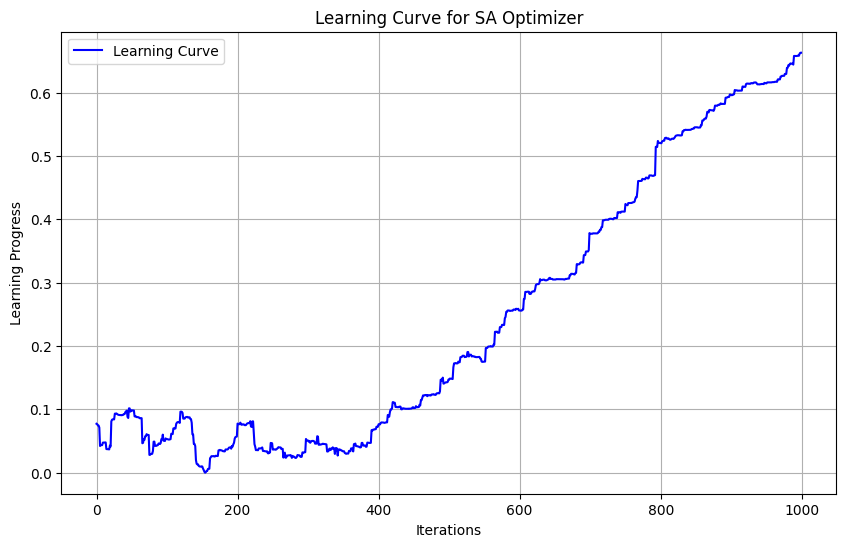

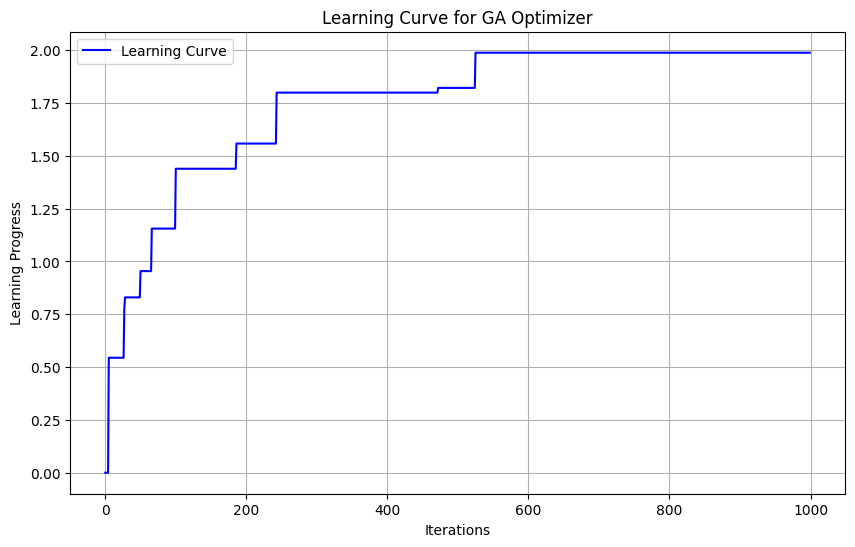

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#plot curves

def plot_curves(curve, title):
    # Plotting the learning curve for RHC optimizer
    plt.figure(figsize=(10, 6))
    plt.plot(curve, label='Learning Curve', color='blue')
    plt.title(f'Learning Curve for {title}')
    plt.xlabel('Iterations')
    plt.ylabel('Learning Progress')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# inverted_curve = np.max(rhc_nn.fitness_curve[:,0]) - rhc_nn.fitness_curve[:,0] 

plot_curves(np.max(rhc_nn.fitness_curve[:,0]) - rhc_nn.fitness_curve[:,0] , 'RHC Optimizer')
plot_curves(np.max(sa_nn.fitness_curve[:,0]) - sa_nn.fitness_curve[:,0] , 'SA Optimizer')
plot_curves(np.max(ga_nn.fitness_curve[:,0]) - ga_nn.fitness_curve[:,0] , 'GA Optimizer')

In [22]:

no_ro_nn = train_nn_with_optimizer(X_train_scaled, X_test_scaled, y_train, y_test, 'gradient_descent', 'Gradient Descent')
 


max iterations 1000
Gradient Descent Training Accuracy: 0.4525
Gradient Descent Testing Accuracy: 0.4610
Gradient Descent took 42.973735094070435 seconds to execute.


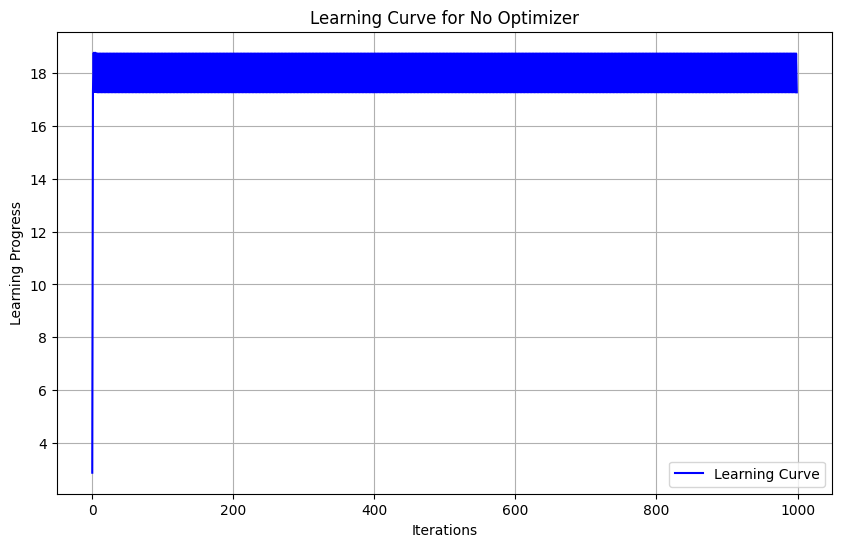

In [35]:
import matplotlib.pyplot as plt

def plot_curves(curve, title):
    # Plotting the learning curve for RHC optimizer
    plt.figure(figsize=(10, 6))
    plt.plot(curve, label='Learning Curve', color='blue')
    plt.title(f'Learning Curve for {title}')
    plt.xlabel('Iterations')
    plt.ylabel('Learning Progress')
    plt.legend()
    plt.grid(True)
    plt.show()

inverted_curve = [-x for x in no_ro_nn.fitness_curve]
plot_curves(inverted_curve, 'No Optimizer')


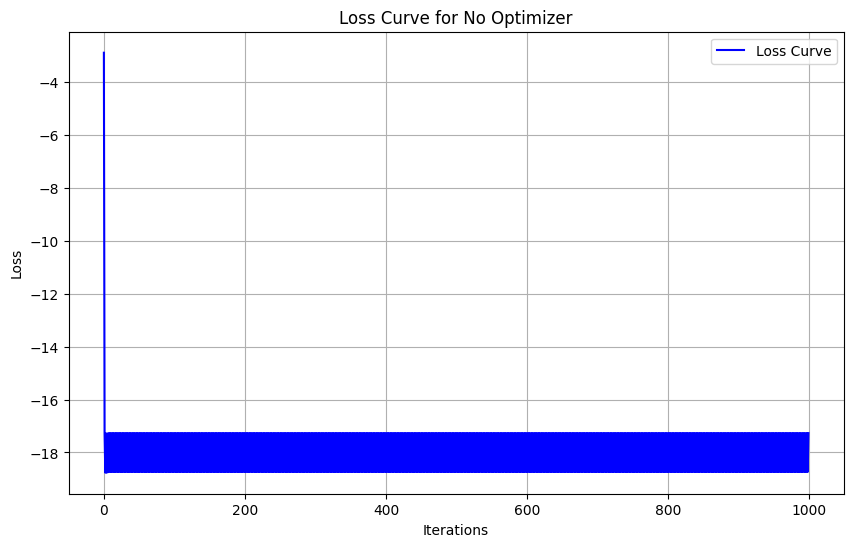

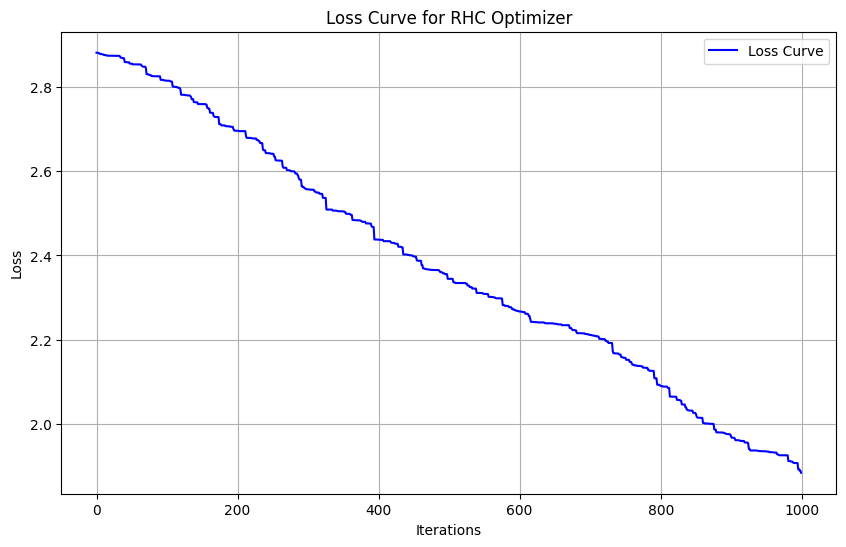

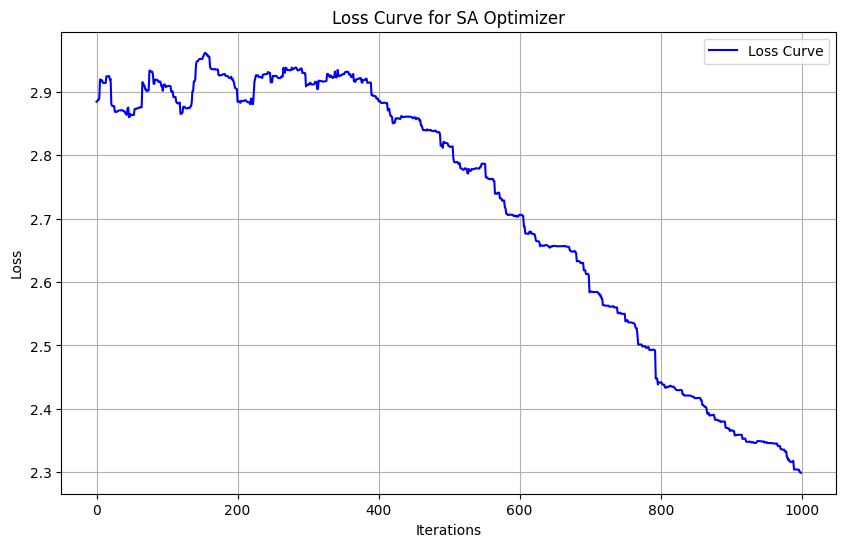

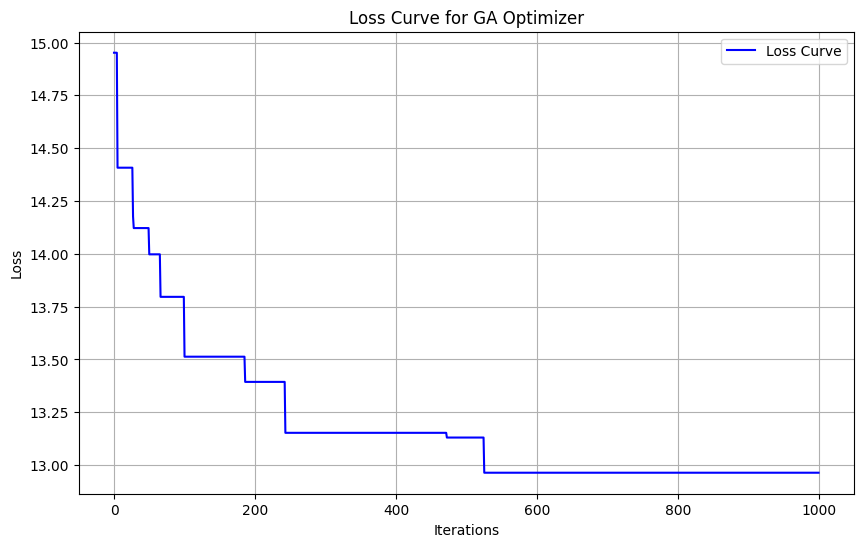

In [38]:
def plot_curves(curve, title):
    # Plotting the learning curve for RHC optimizer
    plt.figure(figsize=(10, 6))
    plt.plot(curve, label='Loss Curve', color='blue')
    plt.title(f'Loss Curve for {title}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_curves(no_ro_nn.fitness_curve, 'No Optimizer')
plot_curves(rhc_nn.fitness_curve[:,0], 'RHC Optimizer')
plot_curves(sa_nn.fitness_curve[:,0], 'SA Optimizer')
plot_curves(ga_nn.fitness_curve[:,0], 'GA Optimizer')

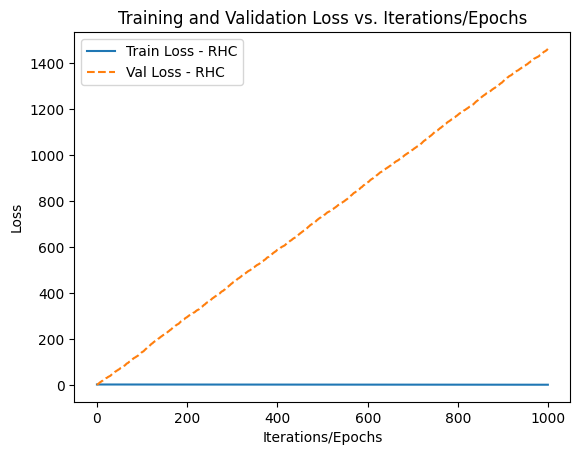

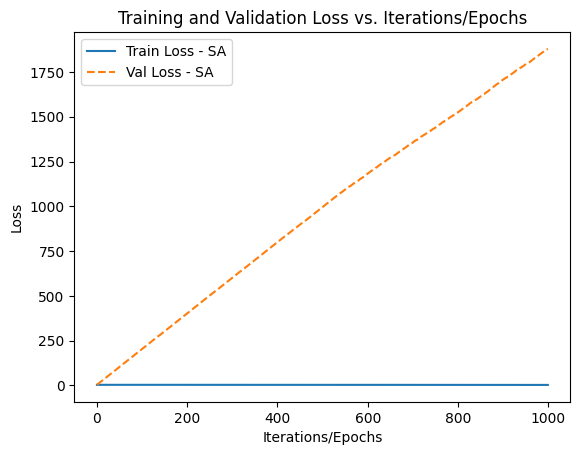

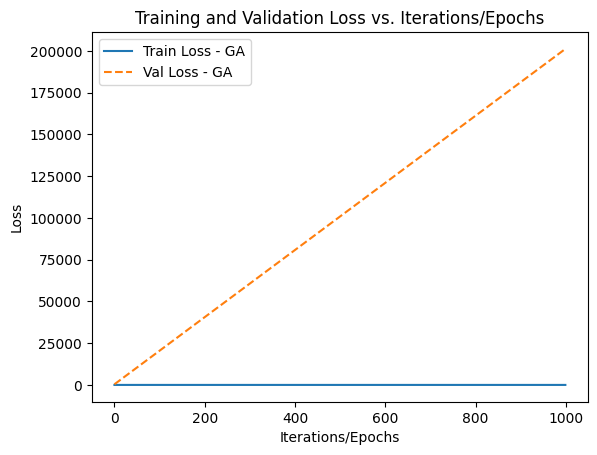

In [37]:
def plot_loss_curve(optimizer_nn, label):
    train_loss = optimizer_nn.fitness_curve[:, 0]  # Assuming 1st column is training loss
    val_loss = optimizer_nn.fitness_curve[:, 1]  # Assuming 2nd column is validation loss
    iterations = range(len(train_loss))
    
    plt.plot(iterations, train_loss, label=f'Train Loss - {label}')
    plt.plot(iterations, val_loss, label=f'Val Loss - {label}', linestyle='--')
    plt.xlabel('Iterations/Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss vs. Iterations/Epochs')
    plt.show()

plot_loss_curve(rhc_nn, 'RHC')
plot_loss_curve(sa_nn, 'SA')
plot_loss_curve(ga_nn, 'GA')

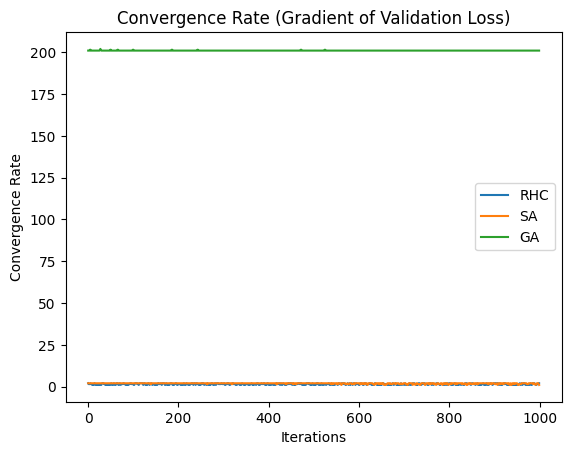

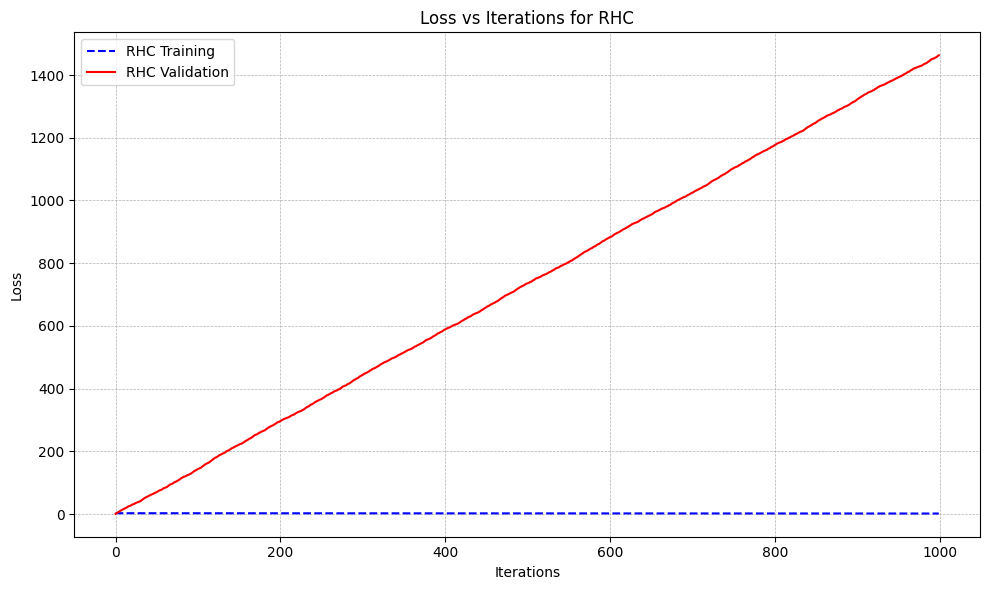

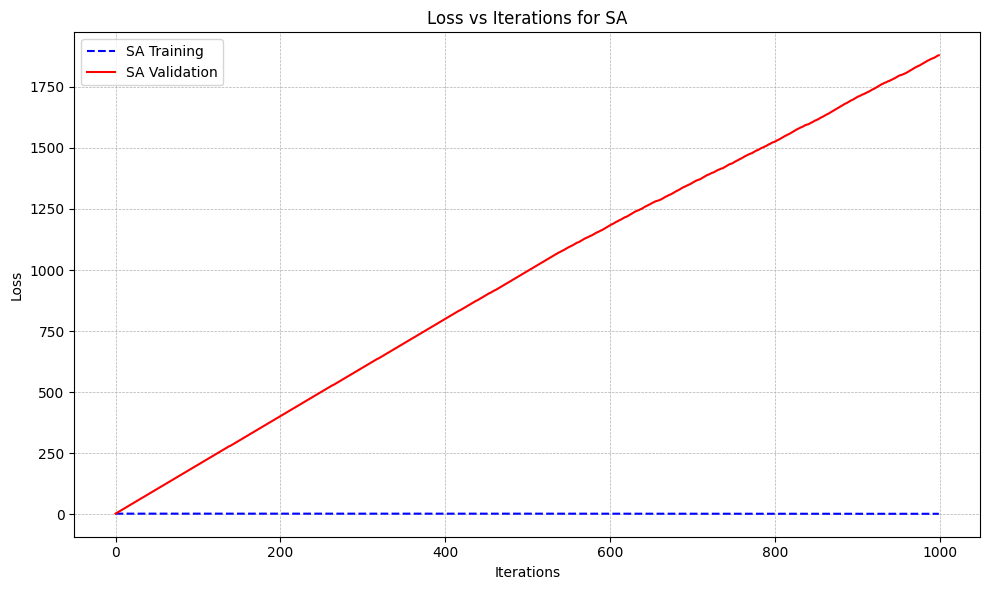

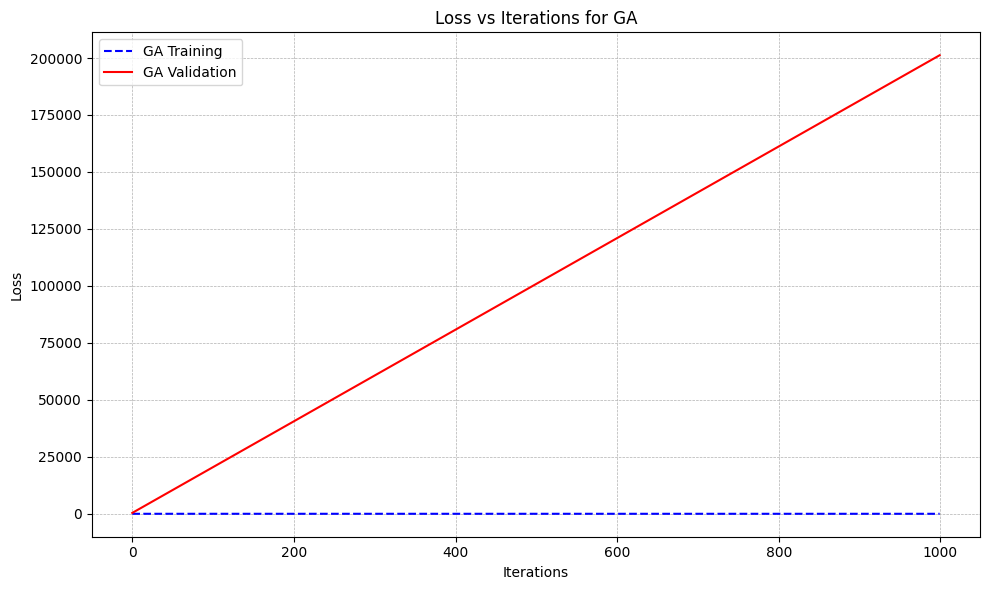

In [48]:
import matplotlib.pyplot as plt

# def plot_accuracy_vs_iterations(models):
#     for name, model_data in models.items():
#         plt.plot([model_data['train_accuracy']] * len(model_data['fitness_curve']), label=name + " Train", linestyle='--')
#         plt.plot([model_data['test_accuracy']] * len(model_data['fitness_curve']), label=name + " Test", linestyle='-')
#     plt.title("Accuracy vs Iterations")
#     plt.xlabel("Iterations")
#     plt.ylabel("Accuracy")
#     plt.legend()
#     plt.show()

import matplotlib.pyplot as plt

# def plot_loss_vs_iterations(models):
#     markers = ['o', 's', '^', 'v', 'D']
#     linestyles = ['--', '-', '-.', ':']
    
#     plt.figure(figsize=(12, 8))
#     for idx, (name, model_data) in enumerate(models.items()):
#         plt.plot(model_data['fitness_curve'][:, 0], label=name + " Training", 
#                  marker=markers[idx], linestyle=linestyles[0], linewidth=1.5, markersize=5)
#         plt.plot(model_data['fitness_curve'][:, 1], label=name + " Validation", 
#                  marker=markers[idx], linestyle=linestyles[1], linewidth=1.5, markersize=5)
    
#     plt.title("Loss vs Iterations")
#     plt.xlabel("Iterations")
#     plt.ylabel("Loss")
#     plt.legend()
#     plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#     plt.tight_layout()
#     plt.show()

import matplotlib.pyplot as plt

def plot_individual_loss_vs_iterations(models):
    linestyles = ['--', '-']
    
    for name, model_data in models.items():
        plt.figure(figsize=(10, 6))
        
        plt.plot(model_data['fitness_curve'][:, 0], label=name + " Training", 
                 linestyle=linestyles[0], linewidth=1.5, color='blue')
        plt.plot(model_data['fitness_curve'][:, 1], label=name + " Validation", 
                 linestyle=linestyles[1], linewidth=1.5, color='red')
        
        plt.title(f"Loss vs Iterations for {name}")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()




def plot_convergence(models):
    for name, model_data in models.items():
        plt.plot(np.gradient(model_data['fitness_curve'][:, 1]), label=name)  # Using validation loss for convergence rate
    plt.title("Convergence Rate (Gradient of Validation Loss)")
    plt.xlabel("Iterations")
    plt.ylabel("Convergence Rate")
    plt.legend()
    plt.show()

rhc_model = {
    'model': rhc_nn,
    'train_accuracy': 0.4407,
    'test_accuracy': 0.4469,
    'fit_time': 21.602919101715088,
    'fitness_curve': rhc_nn.fitness_curve
}

ga_model = {
    'model': ga_nn,
    'train_accuracy': 0.4429,
    'test_accuracy': 0.4513,
    'fit_time': 27.582149744033813,
    'fitness_curve': ga_nn.fitness_curve
}

sa_model = {
    'model': sa_nn,
    'train_accuracy': 0.6403,
    'test_accuracy': 0.6490,
    'fit_time': 3165.764562368393,
    'fitness_curve': sa_nn.fitness_curve
}
models = {
    'RHC': rhc_model,
    'SA': sa_model,
    'GA': ga_model
}

# plot_loss_vs_iterations(models)
# plot_accuracy_vs_iterations(models)
plot_convergence(models)
plot_individual_loss_vs_iterations(models)

# print(rhc_model['fitness_curve'].shape)

